# Colab Notebook: Extended Symbolic Zeta Test Near α and Other Constants
---
This notebook performs a series of symbolic zeta function tests and compares convergence behavior relative to physical and mathematical constants.
We incorporate transformations, entropy, digit matches, folded residue tests, and binary sequences such as the Fibonacci word.


In [5]:
!pip install sympy mpmath bitstring matplotlib numpy --quiet

In [6]:

import numpy as np
import matplotlib.pyplot as plt
from sympy import sqrt
from mpmath import mp, mpf, zeta, pi, e, log10
from bitstring import BitArray
from collections import Counter
mp.dps = 100


In [7]:
phi = (1 + mp.sqrt(5)) / 2
alpha_inv = mpf('137.035999084')
alpha_scaled = 1 / alpha_inv / 1000
consts_base = {'alpha': alpha_scaled, 'pi': pi, 'e': e, 'zeta3': zeta(3)}
multipliers = [1, 1/2, 1/3, 1/4, 1/sqrt(3), 1/sqrt(2), sqrt(2), sqrt(3), 3, 8, 9]

# Function to apply transformations to a constant
def transform_constant(k, c, multipliers):
    transformed = {f'{k}_x{m}': c * m for m in multipliers}
    transformed.update({
        f'{k}_sqrt': sqrt(c),
        f'{k}_ssqrt': sqrt(sqrt(c)),
        f'{k}_inv': 1/c,
        f'{k}_1mc': 1-c
    })
    return transformed

# Flatten transformed constants
transformed_constants = {}
for k, c in consts_base.items():
    transformed_constants.update(transform_constant(k, c, multipliers))

In [8]:

def prime_factors(n):
    i, factors = 2, []
    while i * i <= n:
        if n % i:
            i += 1
        else:
            n //= i
            factors.append(i)
    if n > 1:
        factors.append(n)
    return factors

def liouville(n):
    pf = Counter(prime_factors(n))
    return (-1)**sum(pf.values())

def symbolic_zeta_phi(N, s):
    total = mpf(0)
    for n in range(1, N + 1):
        total += liouville(n) / (n**s) * (phi ** n)
    return total


In [9]:

def digit_match(a, b, ndigits=20):
    sa = str(a)[:ndigits]
    sb = str(b)[:ndigits]
    match = 0
    for ca, cb in zip(sa, sb):
        if ca == cb:
            match += 1
        else:
            break
    return match


In [10]:

def fibonacci_word(n):
    a, b = "0", "01"
    while len(b) < n:
        a, b = b, b + a
    return b[:n]

def binary_to_decimal(bits):
    return sum(int(b) * 2**(-i-1) for i, b in enumerate(bits))


In [11]:

s = 1.0
N_range = range(10, 301, 5)
ks = [729, 9, 3, 27, 37, 81]

folded_results = {k: {name: [] for name in transformed_constants} for k in ks}
match_results = {name: [] for name in transformed_constants}

for N in N_range:
    val = symbolic_zeta_phi(N, s)
    for name, target in transformed_constants.items():
        match_results[name].append((N, digit_match(val, target)))
        for k in ks:
            delta = abs(val - target) % (1 / k)
            folded_results[k][name].append((N, float(delta)))


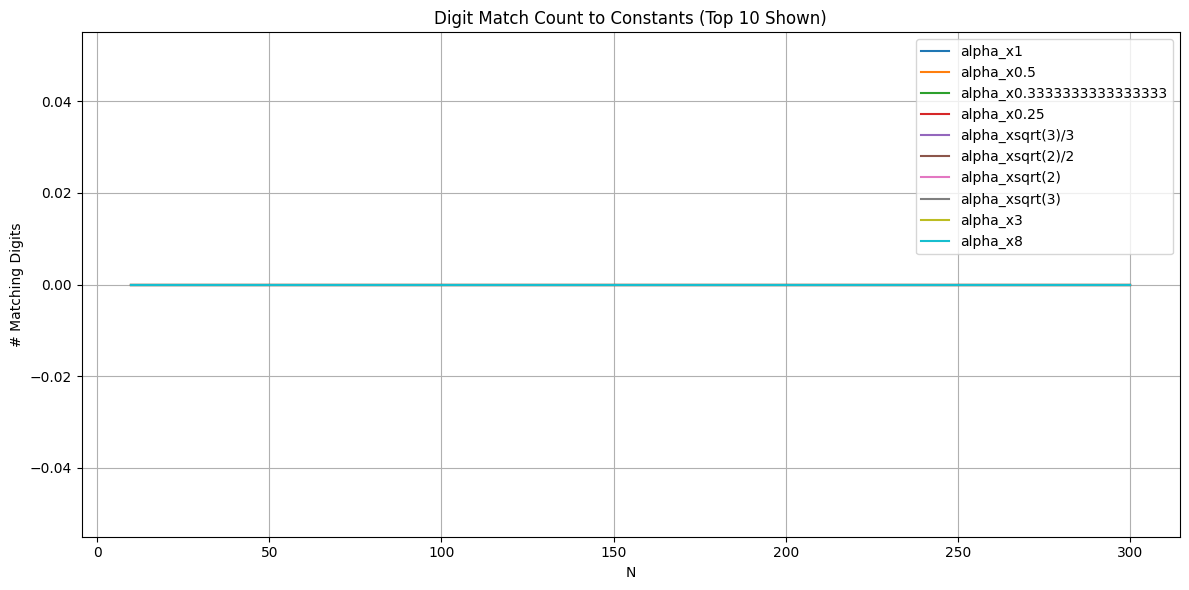

In [12]:

plt.figure(figsize=(12, 6))
for name, data in list(match_results.items())[:10]:  # Plot subset for clarity
    Ns, matches = zip(*data)
    plt.plot(Ns, matches, label=name)
plt.title("Digit Match Count to Constants (Top 10 Shown)")
plt.xlabel("N")
plt.ylabel("# Matching Digits")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


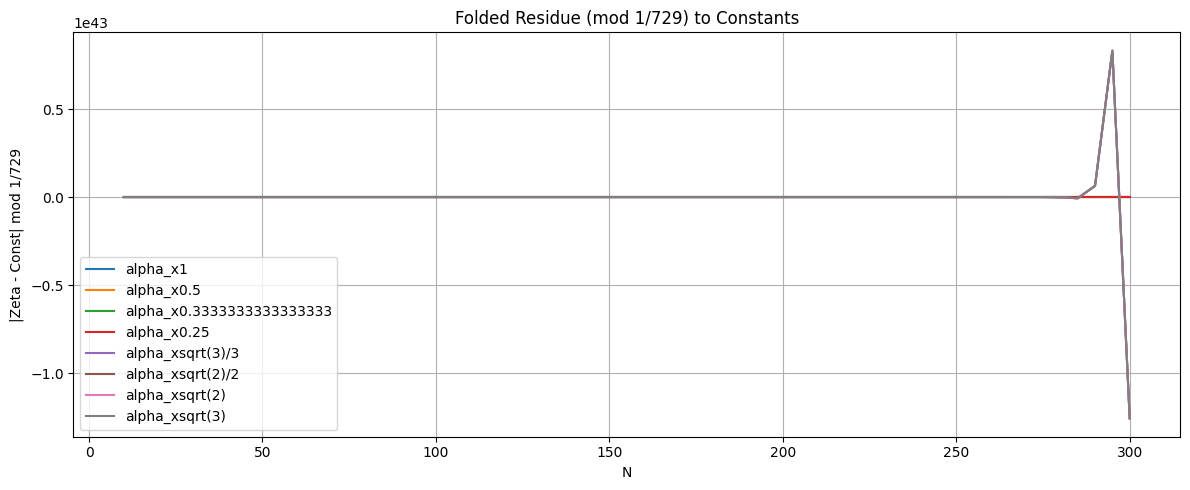

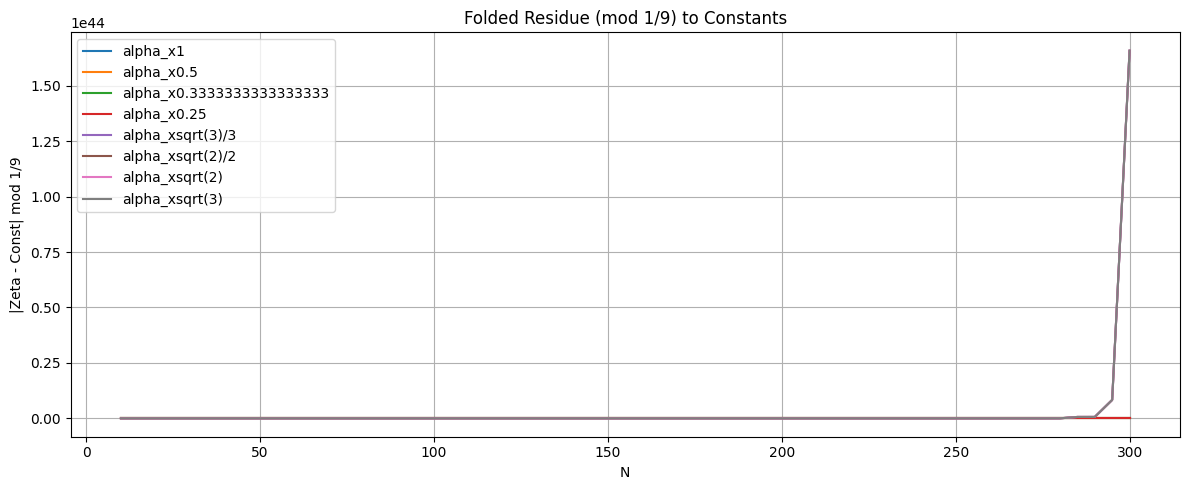

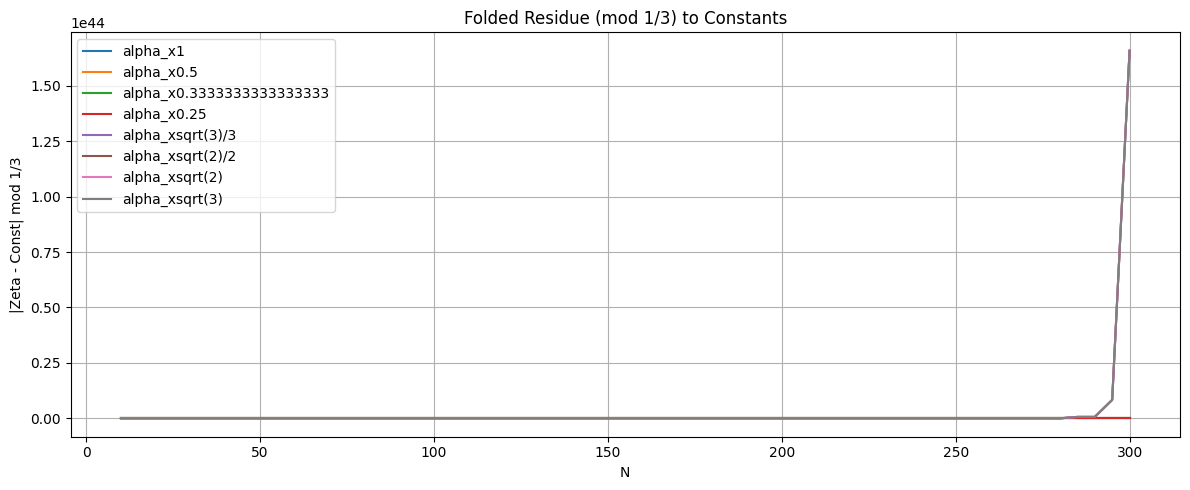

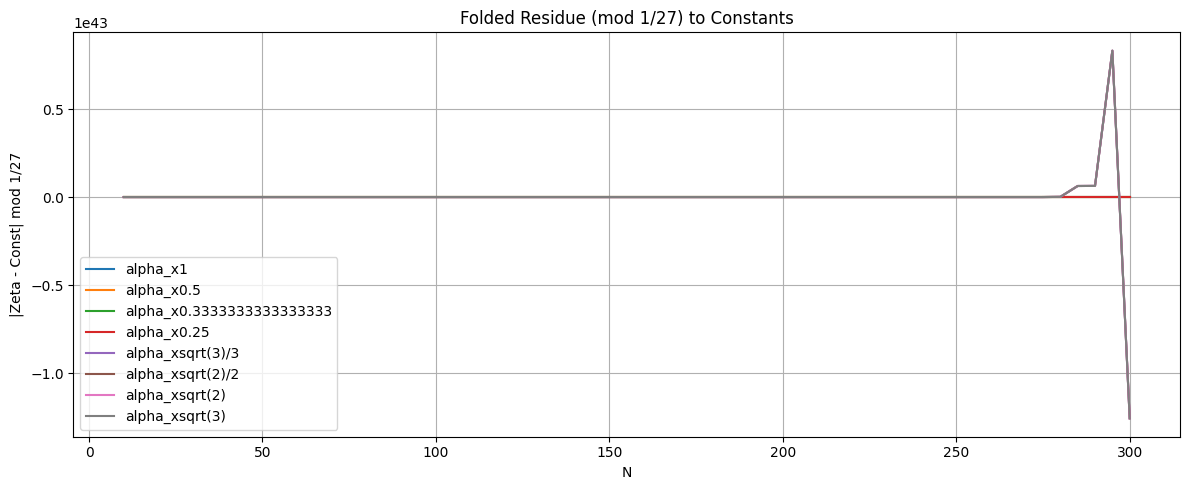

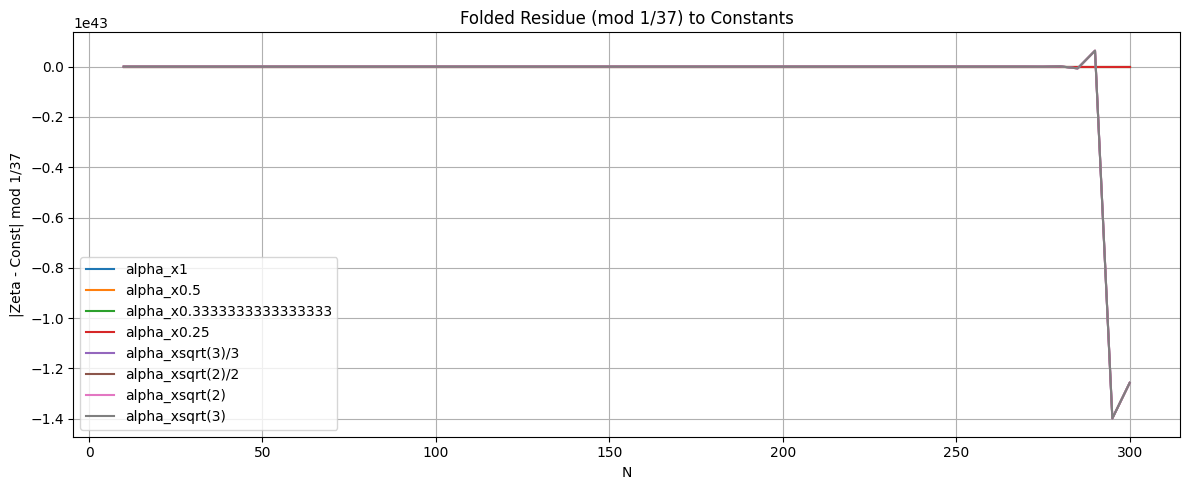

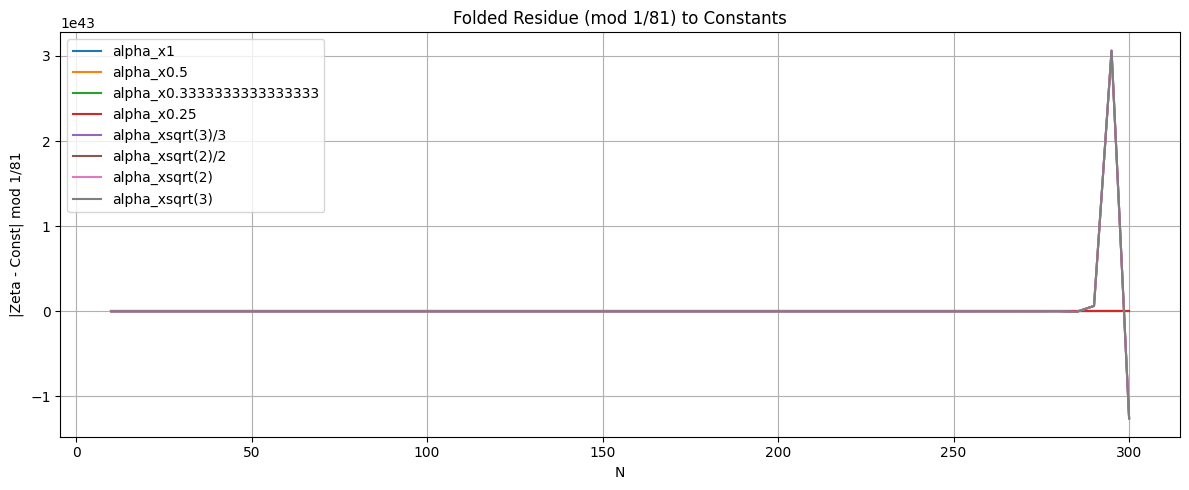

In [13]:

for k in ks:
    plt.figure(figsize=(12, 5))
    for name, data in list(folded_results[k].items())[:8]:
        Ns, residues = zip(*data)
        plt.plot(Ns, residues, label=name)
    plt.title(f"Folded Residue (mod 1/{k}) to Constants")
    plt.xlabel("N")
    plt.ylabel(f"|Zeta - Const| mod 1/{k}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [14]:

fibo_bits = fibonacci_word(40)
fibo_digit = binary_to_decimal(fibo_bits)

print("Fibonacci binary word (first 40):", fibo_bits)
print("Decimal value of fibo digit:", fibo_digit)

# Compare against alpha_scaled
delta = abs(fibo_digit - float(alpha_scaled))
print("Distance to α_scaled:", delta)


Fibonacci binary word (first 40): 0100101001001010010100100101001001010010
Decimal value of fibo digit: 0.2901965571381879
Distance to α_scaled: 0.29018925978561866


Notebook complete. You can now analyze digit stability, folding resonance patterns, and Fibonacci encoding behavior near α and other constants.